# Stat 159 Final Project - Group 15
## Analysis of the Opioid Overdose Death Rate in Different States of the U.S.
**Research Question:** How significant the differences are in crude rate of the states with various levels of economic development?

**Authors:** Jennifer, Irene, Zac, Yi <br>


## Introduction


Opioids are a class of drugs that include the illegal drug heroin, synthetic opioids such as fentanyl, and pain relievers available legally by prescription, such as oxycodone (OxyContin®), hydrocodone (Vicodin®), codeine, morphine, and many others (National Institution on Drug Abuse). While opioids can be effective at managing pain, they also carry a high risk of dependence, addiction, and overdose. In recent years, there has been a significant increase in opioid-related deaths and addiction in the United States, leading to a public health crisis known as the opioid epidemic.

According to NSC Injury Facts, preventable opioid overdose deaths increased by 41% in 2020 and another 18% in 2021 which is possibly a result of the COVID-19 pandemic's disruptions and stress. Among all age groups, individuals between the ages of 35 and 44 have experienced the most opioid overdose deaths, which reached 20,137 in number, representing a 20% increase from 2020 and a 73% increase from 2019. At present, about 71% of opioid overdose deaths are happening among individuals aged 25 to 54, and the number of deaths among people aged 55 and older is increasing rapidly. Children below the age of 15 account for only a small fraction of opioid-related deaths. 

The purpose of analyzing the opioid overdose death rate in different states of the U.S. is to determine whether there is a correlation between the economic status of a state and the rate of opioid overdose deaths.

To investigate this, we will use hypothesis testing to determine if there is a significant difference in opioid overdose death rates between states with different economic statuses. We will collect data on opioid overdose deaths and economic indicators GDP for each state. We will then use statistical methods to analyze the data and test our hypothesis.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats
from opioidtools import plots
from opioidtools import computations

## Data

In [2]:
# Import preprocessed data from data directory
gdp_opioid = pd.read_csv('data/gdp_opioid.csv')
gdp_opioid.head()

,Year,Series ID,State,Region Code,GDP_0101,Deaths,Population,Crude Rate,Prescriptions Dispensed by US Retailers in that year (millions)
0,2010,ALNQGSP,Alabama,1,177249.150,194.0,4779736.0,4.1,210.0
1,2011,ALNQGSP,Alabama,1,183916.625,180.0,4802740.0,3.7,219.0
2,2012,ALNQGSP,Alabama,1,189245.525,175.0,4822023.0,3.6,217.0
3,2013,ALNQGSP,Alabama,1,194786.925,175.0,4833722.0,3.6,207.0
4,2014,ALNQGSP,Alabama,1,197406.850,282.0,4849377.0,5.8,196.0


## EDA

In order to better understand the overall trends of crude rate of different states, we now create a visualization for the states with available data to see the change of crude rates from 2010 to 2014.

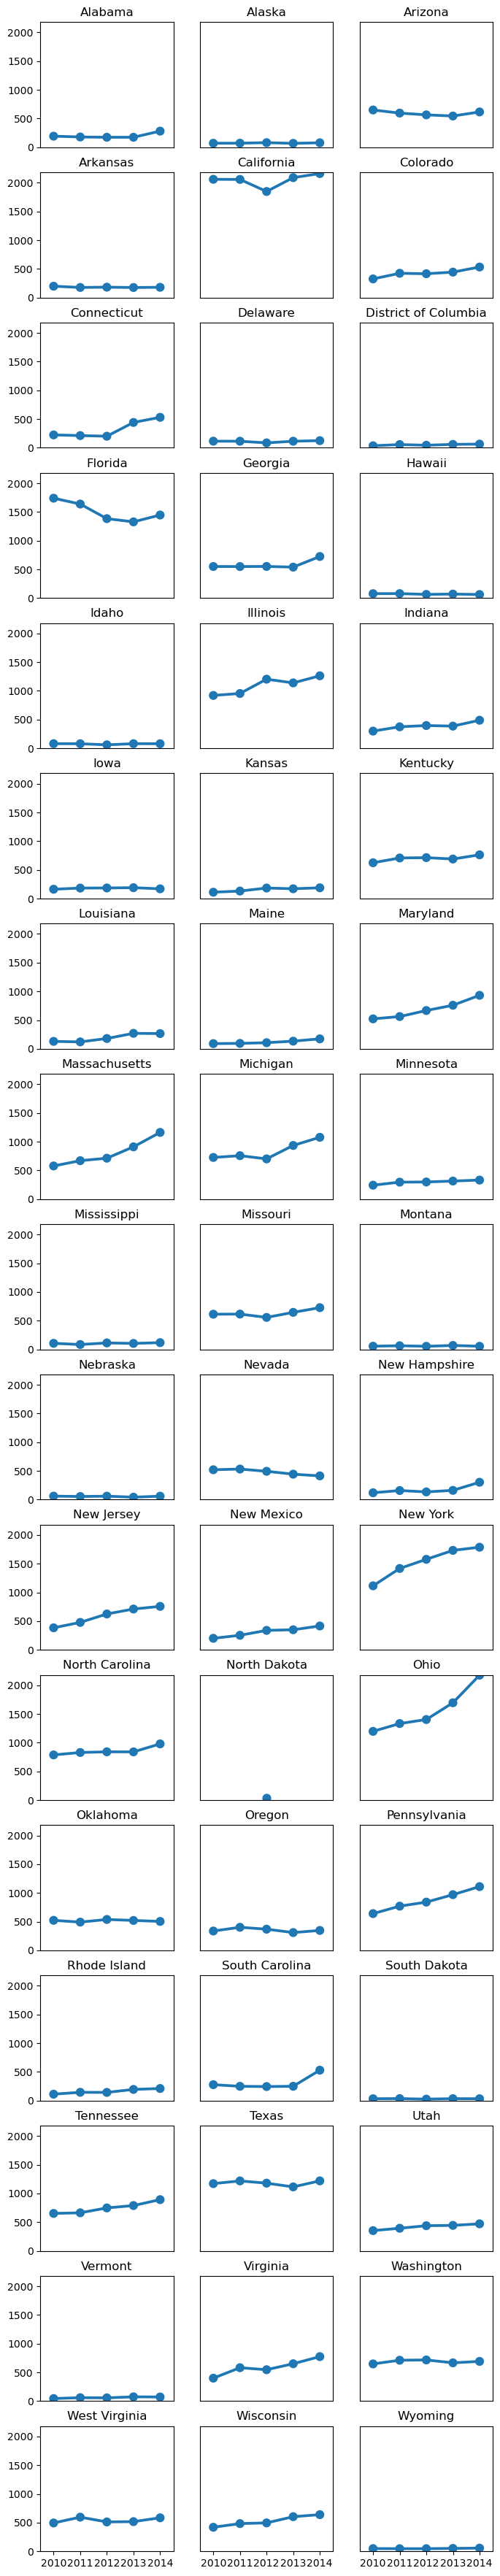

In [3]:
plots.viz(gdp_opioid, 'Deaths')

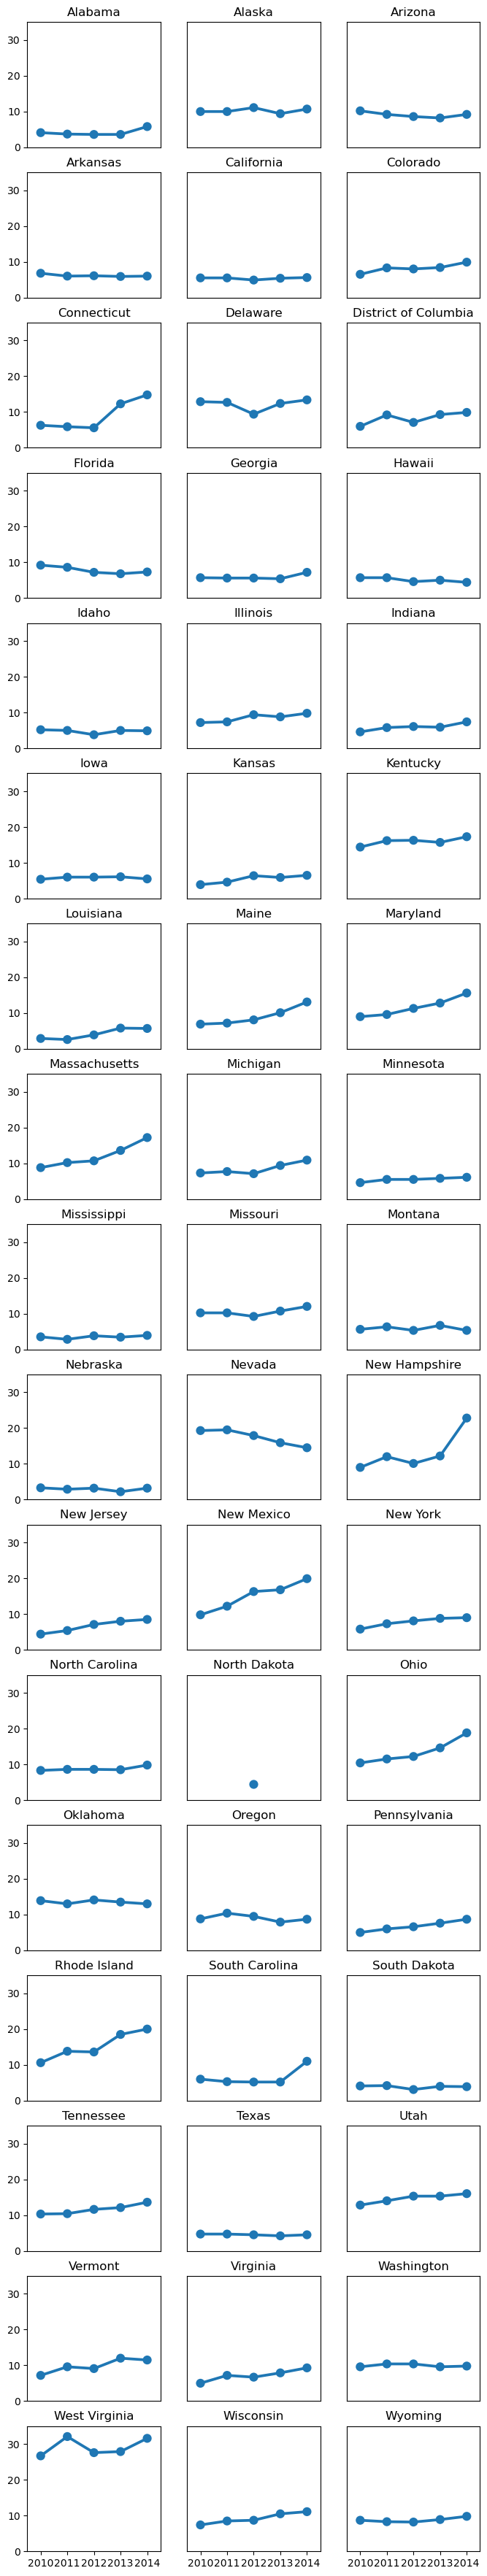

In [4]:
plots.viz(gdp_opioid, 'Crude Rate')

From the visualization above, we can obviously see that some states have significant high crude rates compared to other states. Among those states with abnormal high rates, they have different changes over these 5 years. Some show an increasing trend, whereas some display first decreasing and then increasing trend. The situation is quite complex to analyze as a whole and there are too many states to individually compare each of them (this would also lead to multiple testing errors). Therefore, we are instead going to compare the states with the highest average GDP and lowest average GDP across 2010-2014.

## Initial Analysis:

In order to compare the states with different levels of economic development, we decided to use a T-test for the state with the lowest GDP on average from 2010 to 2014, and the state with the highest GDP on average from 2010 to 2014 to see if there is a siginificant difference in the crude rate. The assumptions we made include the following: 
- large sample size is used
- each state of crude rate and other data relevant to opioid overdose deaths is independent of each other 
- the data collected follows a continuous or ordinal scale
- the data, when plotted, results in a normal distribution, bell-shaped distribution curve

### Visualization of Average GDP for Each State over 2010-2014:

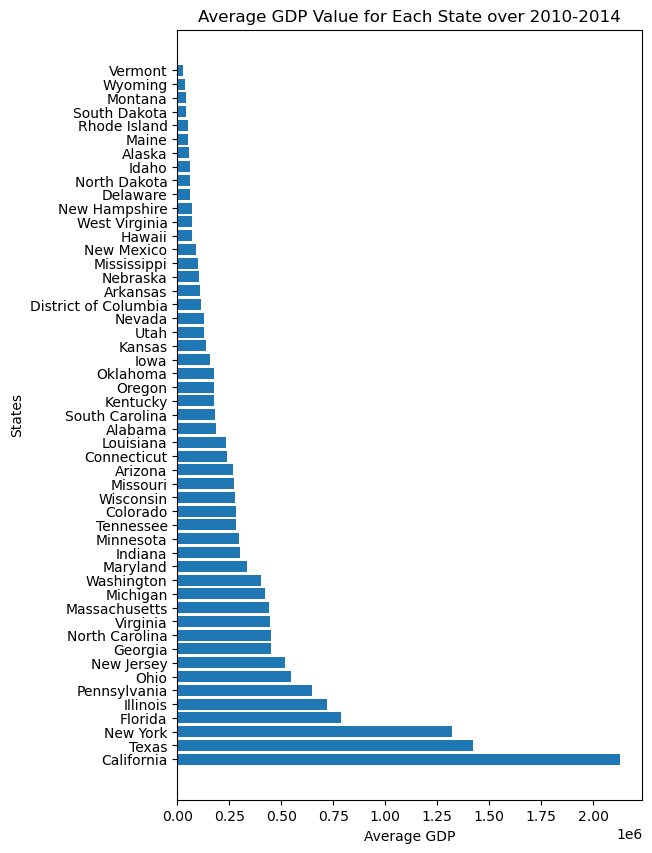

In [5]:
# Find the average GDP for each state over 2010 to 2014 (GDP as of 1/1 of each year)
state_avg_gdp_2010_to_2014 = gdp_opioid.groupby('State')['GDP_0101'].mean()

# Plot
plots.vis_avg_gdp_for_each_state(state_avg_gdp_2010_to_2014)

### Find the minimum, median, and maximum avg GDP among states over 2010 to 2014:

In [6]:
computations.cal_print_min_median_max_gdp(state_avg_gdp_2010_to_2014)

Minimum: 28891.08 State: Vermont
Median: 178983.00 State: South Carolina
Maximum: 2129273.11 State: California


### Visualization of the Highest Average GDP State and the Lowest Average GDP State:

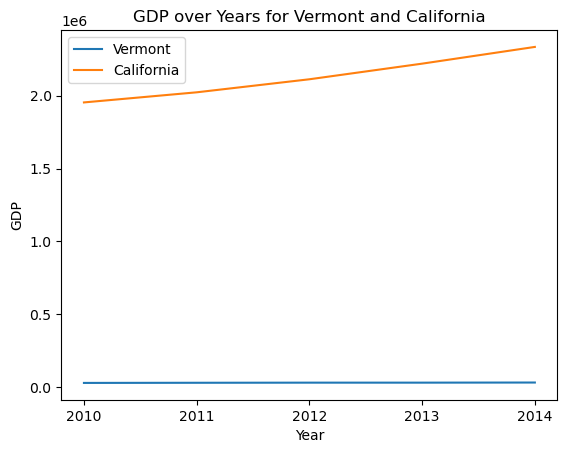

In [7]:
plots.vis_two_avg_gdp_states(gdp_opioid, "Vermont", "California")

### Hypothesis Testing: Highest average GDP state vs. Lowest average GDP state:

$ H_0 $ = There is no significant difference in the crude rate between California and Vermont. 

$ H_1 $ = There is a significant difference in the crude rate between California and Vermont.

In [8]:
computations.cal_print_t_test_CR(gdp_opioid, 'California', 'Vermont' )

T-statistic: -5.145630229646416
p-value: 0.0008790286706211422


### Rough Conclusion: 
The mean crude rate of California is significantly lower than the mean crude rate of Vermont, which indicates that the state with high GDP might have the lower crude rate than the state with low GDP. However, this is not strong and objective enough since it's just the comparation between two states. 

# Extended Analysis:
In the above analysis, only the crude rate of two states (the highest and the lowest average GDP over 2010 to 2014) were compared. Now we will compare the crude rate of two $\textbf{groups}$ of states: states with higher average GDP and states with lower average GDP. We will conduct a t-test to compare the mean values of the "Crude Rate" between these two groups to see if there is a significant difference.

### Hypothesis Testing: High average GDP states vs. Low average GDP states

$ H_0 $ = There is no significant difference in the crude rate between the states with high average GDP and the states with lower average GDP

$ H_1 $ = There is a significant difference in the crude rate between the states with high average GDP and the states with lower average GDP


In [9]:
computations.cal_print_t_test_CR_for_two_groups(gdp_opioid)

T-statistic: -3.5543687730571776
p-value: 0.0004532330883314629


### Final Conclusion:
Based on the results of the t-test, we can reject the null hypothesis that there is no significant difference in the crude rate between the states with higher average GDP and the states with lower average GDP, and we accept the alternative hypothesis. 

Therefore, we conclude that there is a statistically significant difference in the crude rate between these two groups of states, and the t-statistic value -3.55 indicates that the mean crude rate for the states with higher average GDP is lower than the the states with lower average GDP.

# Author Contributions 
Jenny: Set up repository structure, made package installable, wrote docstrings in computations.py and plots.py, and merged two dataframes (in preprocessing). Assisted in functional structure of code & testing by moving functions & plotting code to computations.py and plots.py. Assisted in analysis notebooks & supporting code by helping to organize analysis notebooks.

Zac:Wrote the initial and extended analyses including analyzing the problome, setting up two hypothesis tests, writing two t-tests functions in `opioidtools.computations`, two plotting functions in `opioidtools.plots`, and final conclusion. Assisted in moving functions to the .py package files.

    
Irene: Searched for the datasets and helped with coming up the research question. Wrote the viz function in `opioidtools.plots` for EDA and also added EDA descriptions. Added tests for `opioidtools` and rearranged `opioidtools`'s structure. 
    
Yi: Wrote the introduction of main.ipynb, created Github pages and actions, created makefile, environment, binder and built JupyterBook. Assisted in organizing notebooks.

All members aided in writing the README.md.